In [12]:
!pip install --upgrade sklearn

Requirement already up-to-date: sklearn in c:\anaconda3\lib\site-packages (0.0)


In [19]:
!pip install --upgrade scikit-learn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\anaconda3\\lib\\site-packages\\~-learn\\.libs\\vcomp140.dll'
Consider using the `--user` option or check the permissions.



In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [14]:
data = pd.read_csv('../Data/final_model_data.csv')
data.head()

,SupportTicketID,CustomerID,DateCreated,DateCompleted,Escalated,Theme,Theme_Desc,Text,Sentiment,Process Time,Keywords
0,16582,10007217,2018-06-30,2018-04-07,1,price,cost of the goods to customers. compare to co...,A screwdriver costs over a hundred dollars? Wh...,negative,2.0,"['screwdriver costs', 'dollars', 'prices']"
1,13830,10005984,2018-07-15,2018-07-18,0,speed,consider the delivery speed.,Anyway that I can rush overnight ship my order?,neutral,3.0,['order']
2,53794,10022738,2018-10-14,2018-10-18,0,features,"product features, website features, checkout f...",Are the shelves removable from the wine fridge...,neutral,4.0,"['shelves removable', 'wine fridge', 'bottles']"
3,95013,10040142,2018-01-11,2018-10-11,0,price,cost of the goods to customers. compare to co...,Are there any Christmas sales coming up?,neutral,273.0,['Christmas sales']
4,32660,10013924,2018-06-06,2018-06-06,1,design,"product design, website design",Are there any other colors in the bathroom sin...,neutral,0.0,"['bathroom sink faucet', 'colors']"


### Feature Engineering

In [15]:
from ast import literal_eval

In [29]:
final = data.drop(columns = ['SupportTicketID', 'CustomerID', 'DateCreated', 'DateCompleted'])
final['Keywords'] = [" ".join(literal_eval(x)) for x in final['Keywords']]
one_hot = pd.get_dummies(final['Theme'], drop_first=True)
allData = pd.concat([final, one_hot], axis = 1)
allData = allData.drop(columns = ['Text', 'Sentiment', 'Theme'])
one_hot2 = pd.get_dummies(final['Sentiment'], drop_first=True)
allData = pd.concat([allData, one_hot2], axis = 1)
v = TfidfVectorizer()
x = v.fit_transform(allData['Keywords'])
df1 = pd.DataFrame(x.toarray(), columns=v.get_feature_names())
allData = pd.concat([allData, df1], axis = 1)
v = TfidfVectorizer()
x = v.fit_transform(allData['Theme_Desc'])
df2 = pd.DataFrame(x.toarray(), columns=v.get_feature_names())
allData = pd.concat([allData, df2], axis = 1)
allData = allData.drop(columns = ['Theme_Desc', 'Keywords'])
X = allData.drop(columns = 'Process Time')
y = allData['Process Time']

In [31]:
regressor = LinearRegression()  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
regressor.fit(X_train, y_train) #training the algorithm
print('The mean squared error is:{}'.format(sum((regressor.predict(X_test) - y_test)**2) ** 0.5))
allData['Predicted Process Time'] = regressor.predict(X)
allData['Difference'] = (allData['Process Time'] - allData['Predicted Process Time'])

The mean squared error is:1058699250448297.8


,Process Time,Predicted Process Time,Difference
204,4.000000,-7.647388e+14,7.647388e+14
266,4.000000,-2.937085e+14,2.937085e+14
82,26.750000,-2.813502e+14,2.813502e+14
254,245.000000,-1.397741e+14,1.397741e+14
231,30.000000,-1.163420e+14,1.163420e+14
...,...,...,...
146,37.755556,1.395899e+14,-1.395899e+14
25,1.000000,1.549951e+14,-1.549951e+14
5,6.000000,2.346103e+14,-2.346103e+14
114,6.000000,2.568234e+14,-2.568234e+14


In [33]:
allData[['Process Time', 'Predicted Process Time', 'Difference']].sort_values('Difference', ascending = False).head(327)

,Process Time,Predicted Process Time,Difference
204,4.000000,-7.647388e+14,7.647388e+14
266,4.000000,-2.937085e+14,2.937085e+14
82,26.750000,-2.813502e+14,2.813502e+14
254,245.000000,-1.397741e+14,1.397741e+14
231,30.000000,-1.163420e+14,1.163420e+14
...,...,...,...
146,37.755556,1.395899e+14,-1.395899e+14
25,1.000000,1.549951e+14,-1.549951e+14
5,6.000000,2.346103e+14,-2.346103e+14
114,6.000000,2.568234e+14,-2.568234e+14


Text(0.5,1,'Distribution of Differences in Predicted Value for Linear Regression')

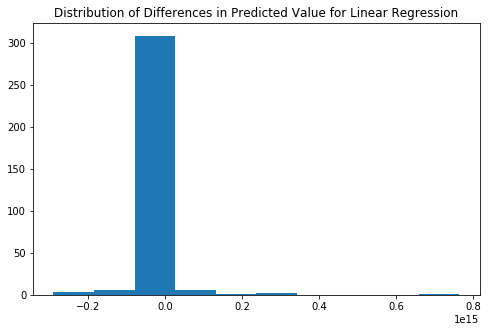

In [45]:
plt.figure(figsize = (8, 5))
plt.hist(allData['Difference'])
plt.title('Distribution of Differences in Predicted Value for Linear Regression')